In [15]:
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

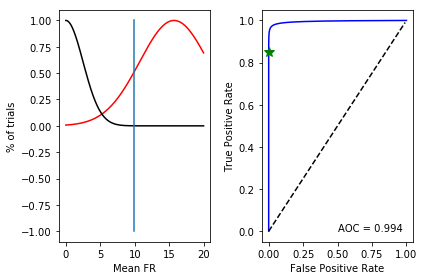

In [100]:
x = np.arange(0.,20.0,.01)
def gaussian(x,mu,sigma):
    return np.exp(-np.square(x-mu)/(2.0*sigma**2))

def past_thresh(y):
    return np.array([y[i:].sum()/y.sum() for i in range(y.size)])

def plot_gaussians(mu1,sigma1,mu2,sigma2,thresh):
    y1 = gaussian(x,mu1,sigma1)
    y2 = gaussian(x,mu2,sigma2)
    
    
    tpr,fpr = past_thresh(y1), past_thresh(y2)
    
    
    plt.subplot(121)
    plt.plot(x,y1,'r-',x,-y2,'k-',[thresh, thresh],[1, -1])
    plt.xlabel('Mean FR')
    plt.ylabel('% of trials')
    
    
    #find closest value to x of threshold
    thresh_i = np.argmin(np.abs(x-thresh))
    
    aoc = np.multiply(tpr,-np.insert(fpr[1:]-fpr[0:-1],-1,1-fpr[-1])).sum()
    aoc_str = "AOC = %.3g" % aoc
    plt.subplot(122)
    unity = np.arange(0,1,.01)
    plt.plot(fpr, tpr,'b-',unity,unity,'k--',fpr[thresh_i],tpr[thresh_i],'g*',ms=10)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(.5,0,aoc_str)
    plt.tight_layout()
    plt.show

    

interact(plot_gaussians,mu1 = (0,20,.1), sigma1 = (.1,5.,.1),mu2 = (0,20,.1), sigma2 = (.1,5.,.1),
        thresh = (0,20,.1))
    